In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

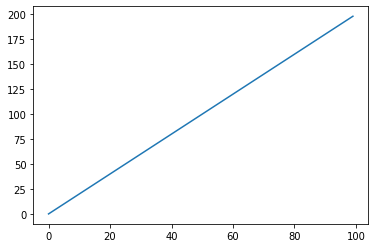

In [2]:
x = range(100)

fig, ax = plt.subplots()
ax.plot(x,[i*2 for i in x])
plt.show()

Basic Plotting

There is 10 basic plots, they follow with their formatting.

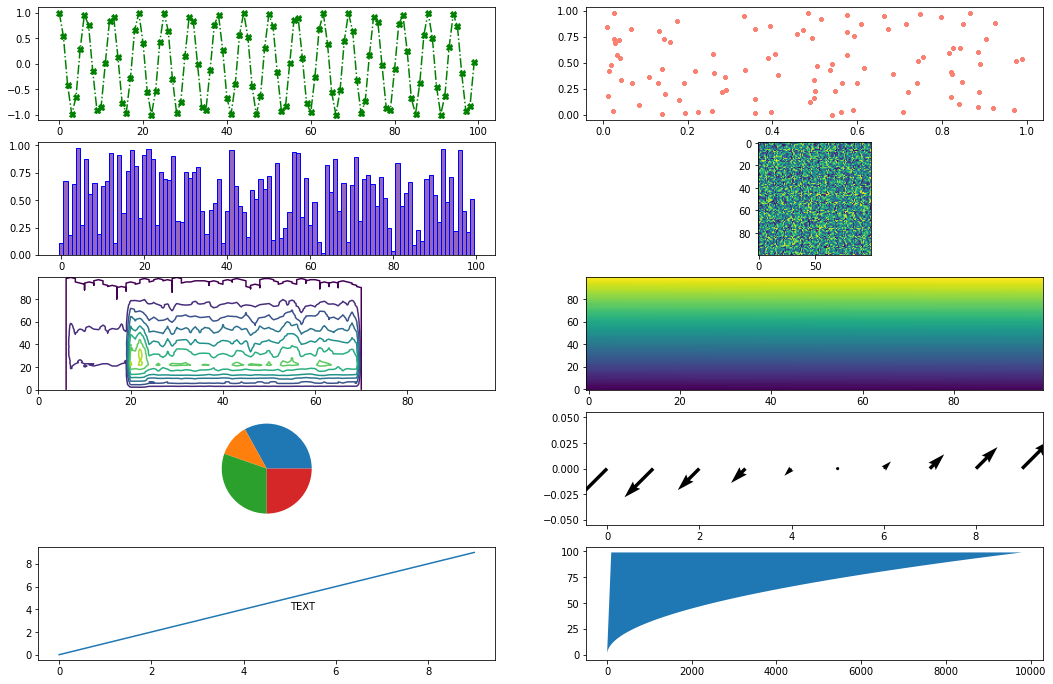

In [7]:
import numpy as np
from funcs import *

rows = 5
columns = 2
fmt = 'b1--'

#Basic plot parameters
x_plot_range = range(100)
y_plot = np.cos(x_plot_range)
fmt_plot = 'gX-.'

#Scatter plot parameters
x_range = np.random.rand(100)
y_range = np.random.rand(100)
size = 10
color = 'salmon'
marker = 'P'

#Bar graph parameters
x_bar = range(100)
heights_bar = np.random.rand(100)
width = 1
color_bar = 'C4'
edgecolor_bar = 'b'

#imshow() Parameters
imshow_matrix = np.random.rand(100,100)

#contour Parameters
x_contour = range(100)
y_contour = range(100)
z_contour = contour_gen(100,4)

#pcolormesh parameters
x_pcolormesh = range(100)
y_pcolormesh = range(100)
z_pcolormesh = pcm_gen(100)
shade='auto'

#quiver parameters
x_quiver = range(-10,10,2)
y_quiver = range(-10,10,2)

#text params
x_text = 5
y_text = 4
text = 'TEXT'

#fill params
x_fill = range(100)
y1_fill = [x**2 for x in x_fill]
y2_fill = [x for x in x_fill]

#pie Params
pieParam = [np.random.randint(100) for i in range(4)]

fig, ax = plt.subplots(rows,columns,figsize=(18,12))
ax[0][0].plot(x_plot_range, y_plot, fmt_plot)
ax[0][1].scatter(x_range,y_range,size,color,marker)
ax[1][0].bar(x_bar,heights_bar,width, color=color_bar, edgecolor=edgecolor_bar)
ax[1][1].imshow(imshow_matrix)
ax[2][0].contour(x_contour, y_contour ,z_contour)
ax[2][1].pcolormesh(x_pcolormesh,y_pcolormesh,z_pcolormesh, shading=shade)
ax[3][0].pie(pieParam)
ax[3][1].quiver(x_quiver, y_quiver)
ax[4][0].text(x_text,y_text, text)
ax[4][0].plot(range(10),range(10))
ax[4][1].fill_betweenx(x_fill, y1_fill, y2_fill)
plt.show()

In [6]:
def contour_gen(n,p):
    Z = np.zeros((n,n))
    for _ in range(p):
        x = np.random.randint(n)
        y = np.random.randint(n)
        height = np.random.randint(1,n-y)
        width_start = n-x
        x_start = [np.random.randint(0,width_start) for i in range(-height,height)]
        for y_coord in range(y,height):
            for x_start_coord in x_start: 
                for x_coord in range(x_start_coord, np.random.randint(x_start_coord,n-x_start_coord)):
                        Z[x_coord][y_coord] += 1
    return Z

contour_gen(100,4)

ValueError: low >= high